In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


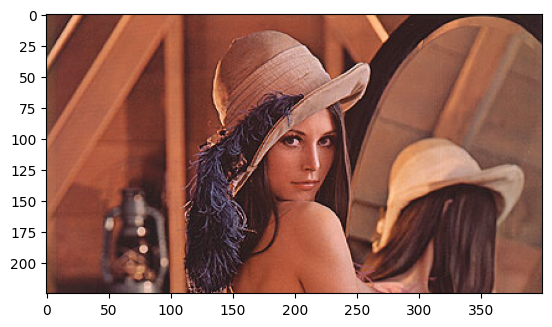

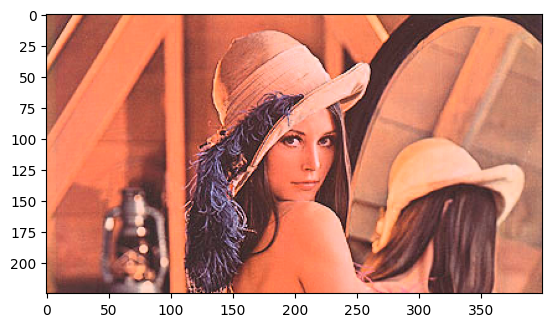

In [16]:
imBGR = cv2.imread('../../images/lena.jpg')

imRGB =  cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

imHSV= cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)


imHSV[:,:,2]  = np.clip(imHSV[:,:,2]*1.5,0,255);
imOutRGB2 =  cv2.cvtColor(imHSV, cv2.COLOR_HSV2RGB)
plt.imshow(imOutRGB2)
plt.show()

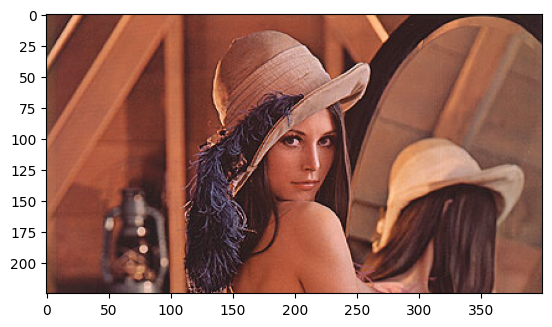

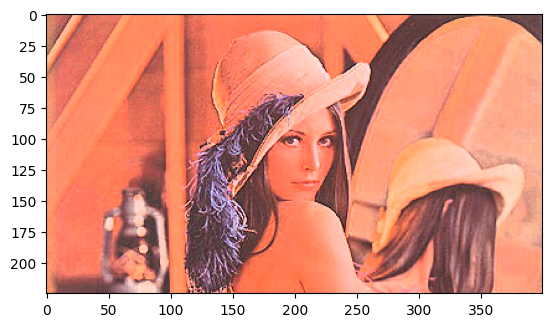

In [ ]:
imBGR = cv2.imread('../../images/lena.jpg')

imRGB =  cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

imHSV= cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)

brightness = float(input("pick a Hue level between 1 and 3"))

imHSV[:,:,2]  = np.clip(imHSV[:,:,2]*brightness,0,255);
imOutRGB2 =  cv2.cvtColor(imHSV, cv2.COLOR_HSV2RGB)
plt.imshow(imOutRGB2)
plt.show()


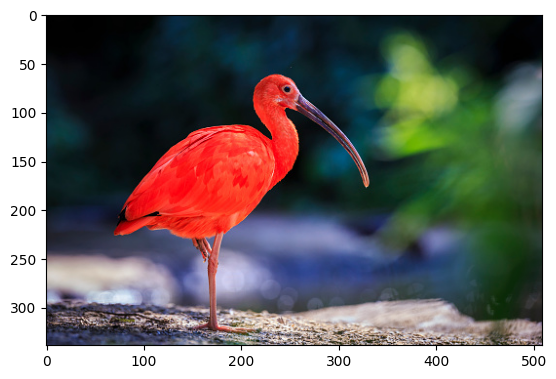

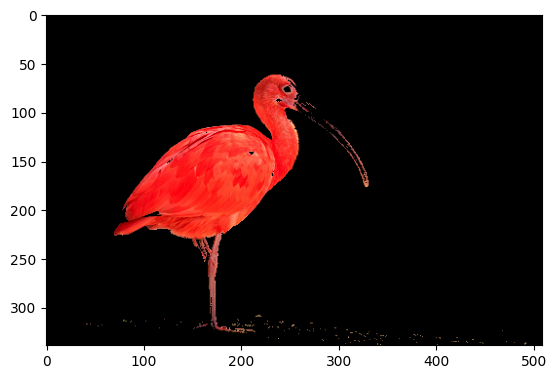

In [30]:
imBGR = cv2.imread('../../images/bird2.jpg')

imRGB =  cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

imHSV= cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([25, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(imHSV, lower_red1, upper_red1)
mask2 = cv2.inRange(imHSV, lower_red2, upper_red2)

red_mask = cv2.bitwise_or(mask1,mask2)

result = cv2.bitwise_and(imRGB, imRGB, mask=red_mask)
plt.imshow(result)


In [36]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load the image
imBGR = cv2.imread('../../images/bird2.jpg')

# Create a window
cv2.namedWindow("Color Detection")

# --- Create sliders ---
cv2.createTrackbar('Hue Range 1', 'Color Detection', 10, 30, nothing)   # controls first red range (0–H1)
cv2.createTrackbar('Hue Range 2', 'Color Detection', 160, 180, nothing) # controls second red range (H2–180)
cv2.createTrackbar('Sat Min', 'Color Detection', 100, 255, nothing)
cv2.createTrackbar('Sat Max', 'Color Detection', 255, 255, nothing)

while True:
    # Get values from sliders
    hue1 = cv2.getTrackbarPos('Hue Range 1', 'Color Detection')
    hue2 = cv2.getTrackbarPos('Hue Range 2', 'Color Detection')
    sat_min = cv2.getTrackbarPos('Sat Min', 'Color Detection')
    sat_max = cv2.getTrackbarPos('Sat Max', 'Color Detection')

    # Convert image to HSV
    imHSV = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for both red hue ranges
    lower_red1 = np.array([0, sat_min, 100])
    upper_red1 = np.array([hue1, sat_max, 255])

    lower_red2 = np.array([hue2, sat_min, 100])
    upper_red2 = np.array([180, sat_max, 255])

    # Create masks for both ranges and combine them
    mask1 = cv2.inRange(imHSV, lower_red1, upper_red1)
    mask2 = cv2.inRange(imHSV, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Apply mask to original image
    imBGR_display = cv2.bitwise_and(imBGR, imBGR, mask=red_mask)

    # Show live result
    cv2.imshow('Color Detection', imBGR_display)

    # Exit with ESC
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2570: error: (-27:Null pointer) NULL window: 'Color Detection' in function 'cvGetTrackbarPos'
